# Titanic dataset

This assigment consists of the introductory problem [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal is to train a classifier to predict persons that have survived the disaster. 

We will start by reading in the, by now standard, Titanic dataset. It contains information about passengers of the Titanic. The information includes i.a. sex, age, name  and passenger class as well as information if the passenger survived or died in the disaster. You can find more details about this data set [here](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

The data  is in "coma separated values" (csv) format and to read it we will use the [pandas](https://pandas.pydata.org) library. Pandas  provides tools for manipulating  data frames and series and is wildly used in data science projects. 

Please note that this is NOT a pandas manual. For detailed explanation of the concepts and functions used here you should consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_all = pd.read_csv("titanic3.csv")

`data_all` is a pandas  [_DataFrame_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object. 

In [3]:
type(data_all)

pandas.core.frame.DataFrame

We can check what attributes are stored in the DataFrame by listing the column names:

In [4]:
data_all.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

or get a quick preview using ```head``` function: 

In [5]:
data_all.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


For the description of those features please see the before mentioned [link](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

Another usefull function is ```info```:

In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


As we can see not all attributes are known (non-null) for every passanger. This is a frequent situation in real datasets. 

In [7]:
data_all.survived.value_counts()/len(data_all)

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [8]:
### Train/test split

As in every machine learning problem we should split our data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
seed =5657
data, test_data = train_test_split(data_all, train_size=0.8, stratify=data_all.survived, random_state=seed)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1047 non-null   int64  
 1   pclass      1047 non-null   int64  
 2   survived    1047 non-null   int64  
 3   name        1047 non-null   object 
 4   sex         1047 non-null   object 
 5   age         845 non-null    float64
 6   sibsp       1047 non-null   int64  
 7   parch       1047 non-null   int64  
 8   ticket      1047 non-null   object 
 9   fare        1046 non-null   float64
 10  cabin       242 non-null    object 
 11  embarked    1045 non-null   object 
 12  boat        389 non-null    object 
 13  body        92 non-null     float64
 14  home.dest   608 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 130.9+ KB


In [12]:
data.survived.value_counts() / len(data)

0    0.617956
1    0.382044
Name: survived, dtype: float64

In [13]:
test_data.survived.value_counts() / len(test_data)

0    0.618321
1    0.381679
Name: survived, dtype: float64

## Problem 1

__a) Implement a Bayes classifier for predicting passenger survival  using sex and pclass  features.__

Actually this problem will be solved for you below to serve as an tutorial on pandas :) 

#### Preliminaries

We will start by extracting from the frame  only the information we need:

In [14]:
data_selected = data[['pclass', 'sex', 'survived']]

In [15]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1047 non-null   int64 
 1   sex       1047 non-null   object
 2   survived  1047 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 32.7+ KB


In [16]:
data_selected.head(5)

,pclass,sex,survived
207,1,female,1
363,2,male,0
966,3,female,0
1292,3,male,0
118,1,male,0


First we need to group passengers according to sex, class and survival status. This can be achieved using  the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function:

In [17]:
grouped = data_selected.groupby(['survived','sex','pclass'])

We can count the number of passegers in each group using function ```size```:

In [18]:
counts = grouped.size()

Object ```counts``` contains all the information that we need to construct the classifier:

In [19]:
counts

survived  sex     pclass
0         female  1           3
                  2          10
                  3          81
          male    1          95
                  2         125
                  3         333
1         female  1         120
                  2          72
                  3          85
          male    1          45
                  2          17
                  3          61
dtype: int64

`counts` is a pandas [_Series_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object indexed by a [_MultiIndex_](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical).

In [20]:
counts.index

MultiIndex([(0, 'female', 1),
            (0, 'female', 2),
            (0, 'female', 3),
            (0,   'male', 1),
            (0,   'male', 2),
            (0,   'male', 3),
            (1, 'female', 1),
            (1, 'female', 2),
            (1, 'female', 3),
            (1,   'male', 1),
            (1,   'male', 2),
            (1,   'male', 3)],
           names=['survived', 'sex', 'pclass'])

We can treat a multi-indexed series as an multi-dimensional table with each level of the index corresponding to one dimension. You can index `counts` to obtain information on specified entry: 

In [21]:
counts[1,'female',2]

72

The index is hierarchical, if we do not provide all indices, a subset of elements will be returned e.g. 

In [22]:
counts[1,'female']

pclass
1    120
2     72
3     85
dtype: int64

list the number of male surviving women  in each class. Similarly 

In [23]:
counts[1]

sex     pclass
female  1         120
        2          72
        3          85
male    1          45
        2          17
        3          61
dtype: int64

lists the number of survivors for each sex and class.

It is however better to use the `loc` function. With this function we can also use the _slicing_ notation. For example 

In [24]:
counts.loc[0, :,3]

survived  sex     pclass
0         female  3          81
          male    3         333
dtype: int64

list non-survivors in third class  regardless of sex. 

Both `[]` and `loc[]` can  also take a _tuple_ as an argument: 

In [25]:
counts.loc[(0, 'female',3)]

81

but the use of slice notation in tuple is not permitted. You can use it by providing an explicit _slice_ object 

In [26]:
counts.loc[(0, slice(None),3)]

survived  sex     pclass
0         female  3          81
          male    3         333
dtype: int64

Function `sum`  as expected returns the sum of all the entries of the series

In [27]:
n_passengers = counts.sum()
n_survivors = counts[1].sum()
n_dead = counts[0].sum()

print(n_passengers, n_survivors, n_dead)
print(n_survivors+n_dead==n_passengers)

1047 400 647
True


### Classifier

To implement classifier we need to calculate the conditional probability of survival given sex and class:

$$P(survived|sex, pclass)$$

$survived$ here is the label taht can take two values 0 for dead and 1 fro survivors, but we can  calculate only the survival probability because of the realation

$$P(survived=1|sex, pclass)+P(survived=0|sex, pclass)=1$$

We can use the Bayes theorem but it will be actually quicker to calculate it directly from the definition:

$$P(survived|sex, pclass)=\frac{P(survived,sex, pclass)}{P(sex, pclass)}
\approx \frac{\#(survived,sex, pclass)}{\#(sex,pclass)}$$

where by $\#$ I have denoted the number of passengers with given attributes. For example the probability of survival for a women traveling in second class is: 

$$\frac{\text{number of women in second class that survived}}{\text{number of women in second class}}$$

which we can calculate as

In [28]:
counts[(1,'female',2)]/(counts[(1,'female',2)]+counts[(0,'female',2)])

0.8780487804878049

This operation has to be repeated for every sex and class combination. We do not have to do it index by index. Pandas have overloaded arithmetic operations that work  on all indices at once e.g. 

In [29]:
by_sex_class = counts.loc[0]+counts.loc[1]

creates a series with number of passengers of each gender and class

In [30]:
by_sex_class

sex     pclass
female  1         123
        2          82
        3         166
male    1         140
        2         142
        3         394
dtype: int64

Same effect can be achieved by passing `level` argument to the series `sum` function. The level argument lists the levels which are __not__ summed over. In other words those are the levels left after summation. To sum over the `survived` level we use

In [31]:
by_sex_class = counts.sum(level=['sex','pclass'])

Using `counts` and `by_sex_class` you can calculate required conditional propabilities. 

In [32]:
p_surv_cond_sex_pclass = (counts/by_sex_class)
p_surv_cond_sex_pclass = p_surv_cond_sex_pclass.reorder_levels(['survived','sex','pclass']).sort_index()

In [33]:
p_surv_cond_sex_pclass

survived  sex     pclass
0         female  1         0.024390
                  2         0.121951
                  3         0.487952
          male    1         0.678571
                  2         0.880282
                  3         0.845178
1         female  1         0.975610
                  2         0.878049
                  3         0.512048
          male    1         0.321429
                  2         0.119718
                  3         0.154822
dtype: float64

In the above expression we have used a very useful feature of pandas series. When performing an arithmetic operation  the elements of the series are _joined_ based on the common index levels.  

`counts` have three levels of index

In [34]:
counts.index.names

FrozenList(['survived', 'sex', 'pclass'])

and `by_sex_class` has two

In [35]:
by_sex_class.index.names

FrozenList(['sex', 'pclass'])

Levels 'sex' and 'pclass' are common to both indexes so the expression

```p_surv_cond_sex_pclass = (counts/by_sex_class)```

will have a three level index with  levels 'survived', 'sex' and 'pclass'  and is equivalent to:

In [36]:
p_surv_cond_sex_pclass = pd.Series(0,index=counts.index)
for survived, sex, pclass in counts.index: 
    p = counts.loc[survived, sex, pclass]/by_sex_class.loc[sex, pclass]
    p_surv_cond_sex_pclass.loc[(survived, sex, pclass)] = p

Unfortunatelly this join operation also reorders the levels of the multi index so we have to order them back using `reorder_levels` and `sort_index` function.

```p_surv_cond_sex_pclass = (counts/by_sex_class).reorder_levels(['survived','sex','pclass']).sort_index()```

We can check that we indeed get the identical values

In [37]:
p_surv_cond_sex_pclass.sum(level=['sex', 'pclass'])

sex     pclass
female  1         1.0
        2         1.0
        3         1.0
male    1         1.0
        2         1.0
        3         1.0
dtype: float64

#### b) Calculate TPR and FPR on the train and test set. Draw the ROC curve and calculate AUC score

The TPR is the fraction of survivors that were classified as survivors. And FPR is the fraction of dead persons that were classified as survivors. We classify a person as survivor when the probability of survival is  greater or equal to one half. 

For ROC and AUC use the functions from scikit-learn library.

TPR 0.6925
FPR 0.14528593508500773
AUC score 0.8327163833075735


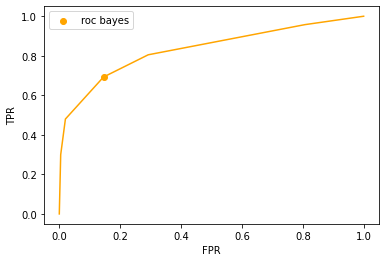

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

def calculate_probs(P, data, columns):
    
    x = [data[column] for column in columns]
    
    return np.array([P[1].loc[p] for p in zip(*x)])

def calculate_predicted(probs):
    
    predicted = (probs >= 0.5)
    
    return predicted

def calculate_fpr(labels, predicted):
    
    fp = (labels < predicted).sum()
    
    neg = (labels == 0).sum()
    
    fpr = fp / neg
    
    return fpr

def calculate_tpr(labels, predicted):
    
    fn = (labels > predicted).sum()
    
    pos = (labels==1).sum()    

    fnr = fn/pos
    tpr = 1 - fnr
    
    return tpr

def calculate_factors(labels, probs):
    
    fprs, tprs, _ = roc_curve(labels, probs)
    
    return (fprs, tprs)

def calculate_auc(labels, probs):
    
    return roc_auc_score(labels, probs)

def plot_roc_curve(fpr, tpr, fprs, tprs):
    
    plt.plot(fprs, tprs, c='orange', zorder=0);
    plt.scatter([fpr],[tpr], c='orange', facecolors='white', zorder=1, label='roc bayes');
    plt.xlabel('FPR');
    plt.ylabel('TPR');
    plt.legend()

    
def show_results():
    
    labels = data_selected['survived']
    probs = calculate_probs(p_surv_cond_sex_pclass, data_selected, ['sex', 'pclass'])
    predicted = calculate_predicted(probs)
    fprs, tprs = calculate_factors(labels, probs)
    fpr = calculate_fpr(labels, predicted)
    tpr = calculate_tpr(labels, predicted)
    
    plot_roc_curve(fpr, tpr, fprs, tprs)
    print(f'TPR {calculate_tpr(labels, predicted)}')
    print(f'FPR {calculate_fpr(labels, predicted)}')
    print(f'AUC score {calculate_auc(labels, probs)}')
    
show_results()    

#### c) Are those features conditionally independent? 

To answer this question we need to compare conditional probability distribution

$$P(sex,pclass|survived)$$

with

$$P(sex|survied)\times P(pclass|survived)$$ 

Please note that $survived$ is actually a label for the survival status: 1 for survived and 0 for dead. 

By definition

$$P(sex,pclass|survived)= \frac{P(sex,pclass,survived)}{P(survived)}$$

which can be calculated based on the `counts` object. 

In [39]:
p_sex_pclass_cond_surv = counts / counts.sum(level='survived')
p_sex_pclass_cond_surv

survived  sex     pclass
0         female  1         0.004637
                  2         0.015456
                  3         0.125193
          male    1         0.146832
                  2         0.193199
                  3         0.514683
1         female  1         0.300000
                  2         0.180000
                  3         0.212500
          male    1         0.112500
                  2         0.042500
                  3         0.152500
dtype: float64

In [40]:
p_sex_pclass_cond_surv.sum(level='survived')

survived
0    1.0
1    1.0
dtype: float64

In [41]:
p_sex_cond_surv = counts.sum(level=['survived', 'sex']) / counts.sum(level='survived')
p_sex_cond_surv

survived  sex   
0         female    0.145286
          male      0.854714
1         female    0.692500
          male      0.307500
dtype: float64

In [42]:
p_pclass_cond_surv = counts.sum(level=['survived', 'pclass']) / counts.sum(level='survived')
p_pclass_cond_surv

survived  pclass
0         1         0.151468
          2         0.208655
          3         0.639876
1         1         0.412500
          2         0.222500
          3         0.365000
dtype: float64

In [43]:
nb_p_sex_pclass_cond_surv = p_sex_cond_surv * p_pclass_cond_surv
nb_p_sex_pclass_cond_surv

survived  sex     pclass
0         female  1         0.022006
                  2         0.030315
                  3         0.092965
          male    1         0.129462
                  2         0.178341
                  3         0.546911
1         female  1         0.285656
                  2         0.154081
                  3         0.252763
          male    1         0.126844
                  2         0.068419
                  3         0.112237
dtype: float64

In [44]:
nb_p_sex_pclass_cond_surv.sum(level='survived')

survived
0    1.0
1    1.0
dtype: float64

In [45]:
res = nb_p_sex_pclass_cond_surv - p_sex_pclass_cond_surv
res

survived  sex     pclass
0         female  1         0.017369
                  2         0.014859
                  3        -0.032228
          male    1        -0.017369
                  2        -0.014859
                  3         0.032228
1         female  1        -0.014344
                  2        -0.025919
                  3         0.040263
          male    1         0.014344
                  2         0.025919
                  3        -0.040263
dtype: float64

In [46]:
res / p_sex_pclass_cond_surv

survived  sex     pclass
0         female  1         3.746007
                  2         0.961360
                  3        -0.257427
          male    1        -0.118295
                  2        -0.076909
                  3         0.062617
1         female  1        -0.047812
                  2        -0.143993
                  3         0.189471
          male    1         0.127500
                  2         0.609853
                  3        -0.264016
dtype: float64

Features seems to be conditionally independent.

__d) Implement a Naive bayes classifier using same features and compare it with a).__

Please calculate the FPR and TPR as well as AUC and draw the ROC curve for train and test datasets. 

We  have already calculated the probability 

$$P_{NB}(sex,pclass|survived) = P(sex|survived)\times P(pclass|survived)$$

From which we can calculate 

$$P_{NB}(survived|sex,pclass)= \frac{P_{NB}(sex,pclass|survived)P(survived)}{P_{NB}(sex,pclass)}$$

where the denominator is also calculated from the factorised probabilities

$$P_{NB}(sex,pclass)= P_{NB}(sex,pclass|survived=1)P(survived=1)+P_{NB}(sex,pclass|survived=0)P(survived=0)$$

That is very important because the result must be a probability and add up to one

$$P_{NB}(survived=1|sex,pclass)+P_{NB}(survived=0|sex,pclass)=1$$

for each sex and passenger class. 

TPR 0.6925
FPR 0.14528593508500773
AUC score 0.825127511591963


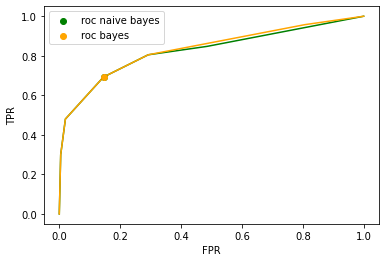

In [50]:
def calculate_surv():
    
    p_surv = counts.sum(level='survived') / counts.sum()
    nb_num = nb_p_sex_pclass_cond_surv * p_surv
    nb_p_sex_pclass = nb_num.sum(level=['sex', 'pclass'])
    nb_p_surv_cond_sex_pclass = nb_num / nb_p_sex_pclass
    
    return nb_p_surv_cond_sex_pclass.reorder_levels(['survived', 'sex', 'pclass']).sort_index()

def plot_summary_both(nb_fpr, nb_tpr, nb_fprs, nb_tprs):
    plt.plot(nb_fprs, nb_tprs, c='green', zorder=0);
    plt.scatter([nb_fpr],[nb_tpr], c='green', facecolors='white', zorder=1, label='roc naive bayes');
    
    labels = data_selected['survived']
    probs = calculate_probs(p_surv_cond_sex_pclass, data_selected, ['sex', 'pclass'])
    predicted = calculate_predicted(probs)
    fprs, tprs = calculate_factors(labels, probs)
    fpr = calculate_fpr(labels, predicted)
    tpr = calculate_tpr(labels, predicted)
    plot_roc_curve(fpr, tpr, fprs, tprs)

def show_results():
    
    labels = data_selected['survived']
    nb_p_surv_cond_sex_pclass = calculate_surv()
    nb_probs = calculate_probs(nb_p_surv_cond_sex_pclass, data_selected, ['sex', 'pclass'])
    nb_predicted = calculate_predicted(nb_probs)
    nb_fprs, nb_tprs = calculate_factors(labels, nb_probs)
    nb_fpr = calculate_fpr(labels, nb_predicted)
    nb_tpr = calculate_tpr(labels, nb_predicted)
    
    plot_summary_both(nb_fpr, nb_tpr, nb_fprs, nb_tprs)
    print(f'TPR {nb_tpr}')
    print(f'FPR {nb_fpr}')
    print(f'AUC score {calculate_auc(labels, nb_probs)}')
    
show_results()

 ## Problem 2

##### Add age as a feature and implement naive bayes classifier. 

Compute the FPR, TPR and AUC as well as draw the ROC curve. 

#### Hint: 
Consider using it as a categorical variable

We start by constructning a new dataframe with age added:

In [51]:
data_with_age = data_selected.copy()

In [52]:
data_with_age['age'] = data['age']

###  Missing values ! :( 

Unfortunatelly there is a problem. Not all passengers have their age assigned, as we can check by inspecting the dataframe:

In [53]:
data_with_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   sex       1047 non-null   object 
 2   survived  1047 non-null   int64  
 3   age       845 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 40.9+ KB


We can see that there are only 1046 non-null entries for 'age'. We can do it also directly by using the `isna` methods

In [54]:
data['age'].isna().sum()

202

This problem is unfortunatelly very common in data science and machine learning. I will present here several  methods of dealing with this problem.

First solution is to ignore the missing data _i.e._ delete all rows with missing entries. This can be easilly achieved  using `pandas.DataFrame.dropna` method:

In [55]:
data_with_age_cleaned = data_with_age.dropna()

In [56]:
data_with_age_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 207 to 1206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    845 non-null    int64  
 1   sex       845 non-null    object 
 2   survived  845 non-null    int64  
 3   age       845 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.0+ KB


Second method is to fill in the missing values. A good choice would be the  average age (or median)

In [57]:
data_with_age_cleaned.age.mean()

30.152169585798816

In [58]:
data_with_age_filled = data_with_age.fillna(data_with_age.age.median())

The statistical functions conveniently just disregard the missing data. 

In [59]:
data_with_age_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   sex       1047 non-null   object 
 2   survived  1047 non-null   int64  
 3   age       1047 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 40.9+ KB


In [60]:
data_with_age_filled.age.mean()

29.736946800382043

A more "sophisticated" method would be to will the missing values based on the group statistics e.g. average age of persons with same sex and pclass. That can be achieved using `groupby`, and `apply` methods. We could do it in one line, but I will rather do it step by step. 

We start by grouping  data by sex and pclass. We do not group by survived, those are the labels and after training we would not have access to them. 

In [61]:
grouped = data_with_age.groupby(['sex', 'pclass'])

Now we would like to take each group, calculate the mean age, and use it to fill the 'na" values in the group. This can be achieved using the `apply` method

In [62]:
data_with_age_group_filled = grouped.apply(
    lambda g: g.fillna({'age':g.age.mean()})
                        )

The `apply` method takes a function as argument. This functions expects a DataFrame and returs a DataFrame. The groups are passed one by one to this function and the results are assempled together back into the resulting  dataframe.

In [63]:
data_with_age_group_filled.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1047 entries, ('female', 1, 207) to ('male', 3, 1206)
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   sex       1047 non-null   object 
 2   survived  1047 non-null   int64  
 3   age       1047 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 85.1+ KB


In [64]:
data_with_age_group_filled.age.mean()

29.59462618547685

The last method would be to treat the missing data as separate age category. 

Now we will divide age into categories. Just for fun I will define a function that returns a categorizing function

In [65]:
def make_age_categorizer(limits, lbls):
    def categorizer(age):
        if not pd.isna(age):
            for i,l in enumerate(limits):
                if age<=l:
                    return lbls[i]
            return lbls[-1]    
        else:
            return 'unc'

    return categorizer
    

Somewhat arbitrarly I will classify all younger then 12 years as children, between 12 and 60 as adults and older as seniors

In [66]:
ctg = make_age_categorizer([12,60],['child','adult','senior'])

We can use the `cgt` function to add new column containing age categories to dataframe

In [67]:
data_with_age['age_category']=data_with_age.age.apply(ctg)

and group it by all categories

In [68]:
counts_with_age = data_with_age.groupby( ['survived', 'sex', 'pclass', 'age_category']).size()

In [69]:
counts_with_age

survived  sex     pclass  age_category
0         female  1       adult             2
                          child             1
                  2       adult             9
                          unc               1
                  3       adult            47
                          child            10
                          unc              24
          male    1       adult            69
                          senior           13
                          unc              13
                  2       adult           109
                          senior            5
                          unc              11
                  3       adult           213
                          child            20
                          senior            4
                          unc              96
1         female  1       adult           107
                          senior            4
                          unc               9
                  2       adult          

From now on we can proceed as before

In [74]:
def p_cond_surv(d, f, p_surv):
    return d.sum(level=['survived', f]) / counts_with_age.sum(level='survived')

p_surv = counts.sum(level='survived') / counts.sum()
nb_p_with_age_cond_surv = p_cond_surv(counts_with_age, 'sex', p_surv) * p_cond_surv(counts_with_age, 'pclass', p_surv) * p_cond_surv(counts_with_age, 'age_category', p_surv) * p_surv
nb_p_with_age_cond_surv.reorder_levels(['survived', 'sex', 'pclass', 'age_category'])

survived  sex     pclass  age_category
0         female  1       adult           0.009437
                          child           0.000652
                          unc             0.003048
                          senior          0.000462
                  2       adult           0.013000
                          child           0.000898
                          unc             0.004198
                          senior          0.000637
                  3       adult           0.039868
                          child           0.002753
                          unc             0.012875
                          senior          0.001953
          male    1       adult           0.055519
                          child           0.003833
                          unc             0.017929
                          senior          0.002720
                  2       adult           0.076480
                          child           0.005280
                          unc             0

TPR 0.6975
FPR 0.14528593508500773
AUC score 0.8399246522411129


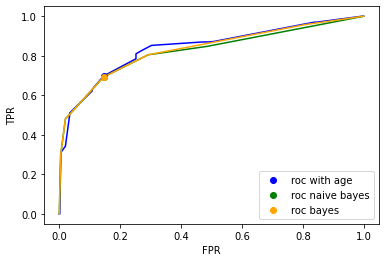

In [79]:
def calculate_surv():
    nb_num = nb_p_sex_pclass_cond_surv * p_surv
    nb_p_sex_pclass = nb_num.sum(level=['sex', 'pclass'])
    nb_p_surv_cond_sex_pclass = nb_num / nb_p_sex_pclass
    return nb_p_surv_cond_sex_pclass.reorder_levels(['survived', 'sex', 'pclass']).sort_index()

def plot_summary(nb_wa_fpr, nb_wa_tpr, nb_wa_fprs, nb_wa_tprs):
    plt.plot(nb_wa_fprs, nb_wa_tprs, c='blue', zorder=0);
    plt.scatter([nb_wa_fpr],[nb_wa_tpr], c='blue', facecolors='white', zorder=1, label='roc with age');
    
    labels = data_selected['survived']
    nb_p_surv_cond_sex_pclass = calculate_surv()
    nb_probs = calculate_probs(nb_p_surv_cond_sex_pclass, data_selected, ['sex', 'pclass'])
    nb_predicted = calculate_predicted(nb_probs)
    nb_fprs, nb_tprs = calculate_factors(labels, nb_probs)
    nb_fpr = calculate_fpr(labels, nb_predicted)
    nb_tpr = calculate_tpr(labels, nb_predicted)
    plot_summary_both(nb_fpr, nb_tpr, nb_fprs, nb_tprs)

def show_results():
    labels = data_selected['survived']
    nb_p_with_age_surv_cond_rest = nb_p_with_age_cond_surv/nb_p_with_age_cond_surv.sum(level=['sex', 'pclass', 'age_category'])
    nb_p_with_age_surv_cond_rest = nb_p_with_age_surv_cond_rest.reorder_levels(['survived', 'sex', 'pclass', 'age_category']).sort_index()
    nb_wa_probs = calculate_probs(nb_p_with_age_surv_cond_rest, data_with_age, ['sex', 'pclass', 'age_category'])
    nb_wa_predicted = calculate_predicted(nb_wa_probs)
    nb_wa_fpr = calculate_fpr(labels, nb_wa_predicted)
    nb_wa_tpr = calculate_tpr(labels, nb_wa_predicted)
    nb_wa_fprs, nb_wa_tprs = calculate_factors(labels, nb_wa_probs)
    
    plot_summary(nb_wa_fpr, nb_wa_tpr, nb_wa_fprs, nb_wa_tprs)
    print(f'TPR {calculate_tpr(labels, nb_wa_predicted)}')
    print(f'FPR {calculate_fpr(labels, nb_wa_predicted)}')
    print(f'AUC score {calculate_auc(labels, nb_wa_probs)}')
    
show_results()